In [ ]:
from google.colab import files
uploaded = files.upload()

Saving House Price Prediction Dataset.csv to House Price Prediction Dataset (1).csv


First 5 rows of the dataset:
   Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0   1  1360         5          4       3       1970  Downtown  Excellent   
1   2  4272         5          4       3       1958  Downtown  Excellent   
2   3  3592         2          2       3       1938  Downtown       Good   
3   4   966         4          2       2       1902  Suburban       Fair   
4   5  4926         1          4       2       1975  Downtown       Fair   

  Garage   Price  
0     No  149919  
1     No  424998  
2     No  266746  
3    Yes  244020  
4    Yes  636056  

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64

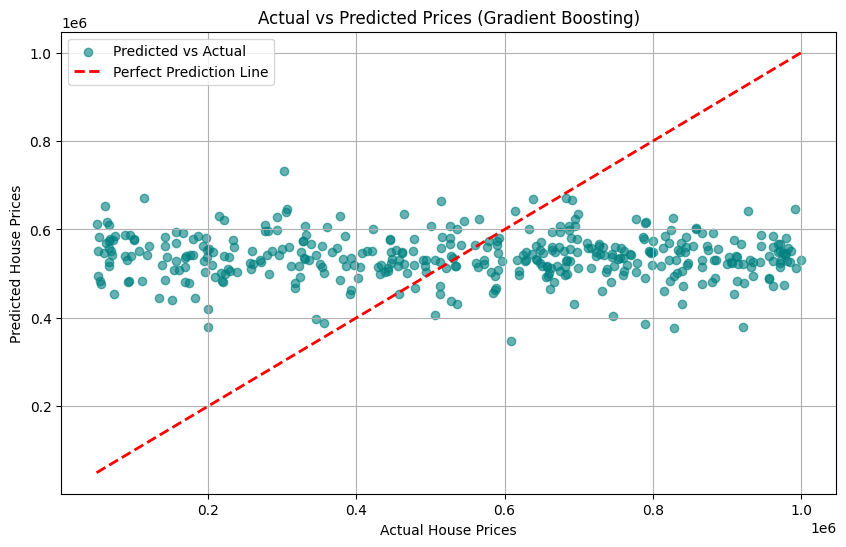


--- Linear Regression Performance ---
Mean Absolute Error (MAE): 242270.48
Root Mean Squared Error (RMSE): 278908.94

--- Gradient Boosting Performance ---
Mean Absolute Error (MAE): 245908.87
Root Mean Squared Error (RMSE): 285531.65


In [ ]:
# 🏠 House Price Prediction Project
# Problem Statement:
# Predict house prices based on property features like Area,
# Bedrooms, Location, and other related details.

# Goal:
# 1. Preprocess the dataset (handle missing values, encode categories)
# 2. Train Linear Regression and Gradient Boosting models
# 3. Evaluate models using Mean Absolute Error (MAE) and RMSE
# 4. Visualize actual vs predicted prices to analyze model performance
# Import necessary libraries for data handling, modeling, and visualization

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset
df = pd.read_csv('House Price Prediction Dataset.csv')  # Make sure this matches your file name

# Display basic info
print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset information:")
print(df.info())

# Drop rows with missing values
df = df.dropna()

# Encode categorical columns: Location, Condition, and Garage
label_encoders = {}
for column in ['Location', 'Condition', 'Garage']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Save encoders if needed later

# Select features and target variable
features = ['Area', 'Bedrooms', 'Location', 'Condition', 'Garage']
target = 'Price'

X = df[features]  # Features matrix
y = df[target]    # Target vector

# Split into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Train Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Make predictions with both models
lr_predictions = lr_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)

# Visualization for Gradient Boosting predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, gb_predictions, alpha=0.6, color='teal', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted Prices (Gradient Boosting)')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate both models
# --- Linear Regression ---
lr_mae = mean_absolute_error(y_test, lr_predictions)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print("\n--- Linear Regression Performance ---")
print(f"Mean Absolute Error (MAE): {lr_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {lr_rmse:.2f}")

# --- Gradient Boosting ---
gb_mae = mean_absolute_error(y_test, gb_predictions)
gb_rmse = np.sqrt(mean_squared_error(y_test, gb_predictions))
print("\n--- Gradient Boosting Performance ---")
print(f"Mean Absolute Error (MAE): {gb_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {gb_rmse:.2f}")
